<a href="https://colab.research.google.com/github/royanlord/DL_Image-Classification_Pneumonia/blob/main/DL_colabs_image_classification_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


latihan yang dipelajari meliputi:
    1. preprocessing
    2. load gambar dalam sebuah folder
    3. spliting dataset train test
    4. klasifikasi model evaluasi
    5. Find best parameter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# preprocessing

(360, 319, 3)


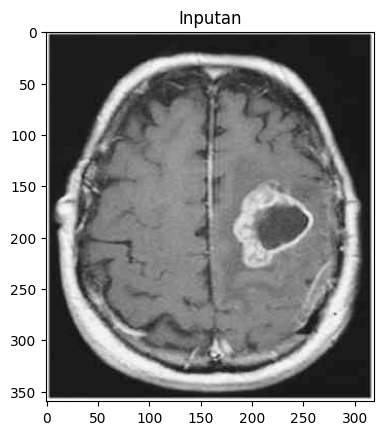

(360, 319)


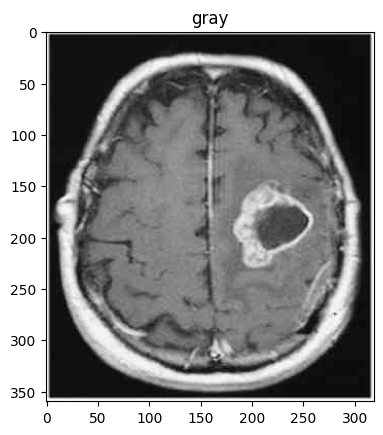

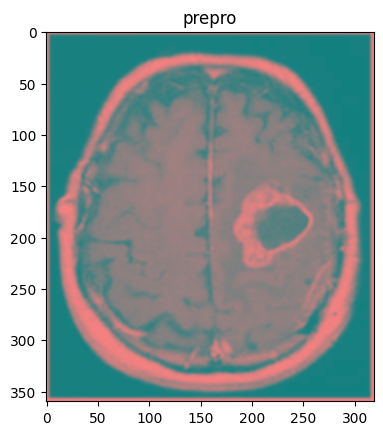

In [ ]:
#image preprocessing
import cv2
import matplotlib.pyplot as plt
import os
import os.path
import numpy as np
import random

image_dir = "/content/drive/MyDrive/COMVIS/Experiment/dataset/brain_tumor_dataset/"
img=cv2.imread(image_dir+'yes/Y10.jpg') #baca file gambar dari direktori dengan menggunakan open cv

print(img.shape)


#dari comvis kesana ubah pake dir anda
#plt digunakan untuk menampilkan plot / gambar
plt.figure()
plt.title("Inputan")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #menampilkan gambar
plt.show() #menampilkan plot


gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)


plt.figure()
plt.title("gray") #membuat judul pada plot
plt.imshow(gray_img, cmap='gray')  # Gunakan 'gray' untuk cmap
plt.show()

convert = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) #konversi dari RGB ke HSV
blur = cv2.GaussianBlur(convert,(5,5),0)  #bluring

plt.figure()
plt.title("prepro") #membuat judul pada plot
plt.imshow(blur) #menampilkan gambar
plt.show()

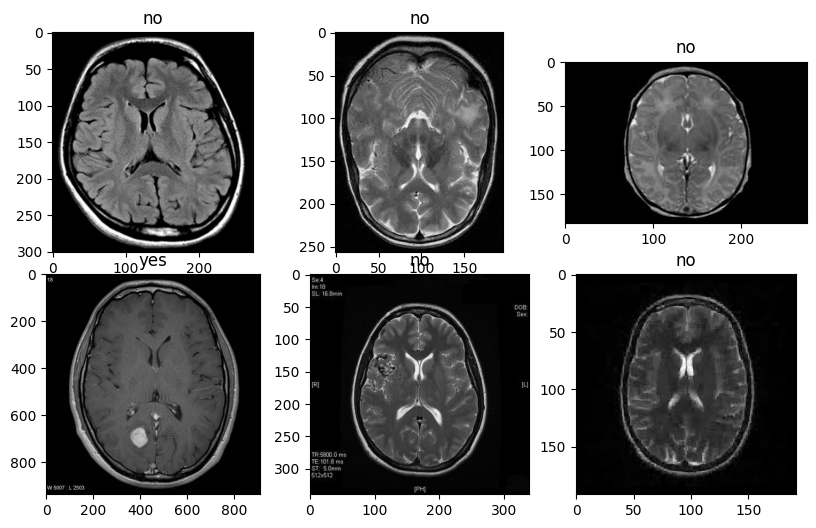

In [ ]:
image_files = []
for subdir in os.listdir(image_dir):
    subdir_path = os.path.join(image_dir, subdir)
    if os.path.isdir(subdir_path):
        for filename in os.listdir(subdir_path):
            if filename.endswith((".jpg", ".png", ".jpeg")):
                image_files.append((subdir, os.path.join(subdir_path, filename)))  # Simpan nama folder dan path file

# Randomly select 6 image files
random_images = random.sample(image_files, 6)

# Create a 2x3 grid for displaying the images
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    folder, img_path = random_images[i]  # Ambil nama folder dan path file
    img = cv2.imread(img_path)
    ax.imshow(img)
    ax.set_title(folder)  # Set title dengan nama folder
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

plt digunakan untuk membuat plot gambar <br>
cv2 perintah open cv untuk gambar

# membaca data dan memberi label

In [ ]:
#menentukan ukuran tinggi dan lebar gambar
height = 128
width = 128
dim = (width, height)
# Fungsi untuk memuat gambar, menetapkan label, dan membuat array numpy
def load_images(dataset_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset_path, class_name)
        print(f"Label {i}: class {class_names[i]}")
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                file_path = os.path.join(class_dir, file_name)
                if file_name.endswith((".jpg", ".png", ".jpeg")):
                # if os.path.isfile(file_path):
                    # Memuat gambar
                    img = cv2.imread(file_path)
                    resized=cv2.resize(img,dim, interpolation=cv2.INTER_LINEAR) #resize
                    img_array = np.array(resized) #terapkan enhancement setelah ini
                    images.append(img_array/255) # normalisasi
                    labels.append(i)  # Label adalah indeks kelas
    return np.array(images), np.array(labels)

# Memuat gambar dan menetapkan label
X, y = load_images(image_dir)

print("Shape dari array gambar:", X.shape)

Label 0: class no
Label 1: class yes
Shape dari array gambar: (179, 128, 128, 3)


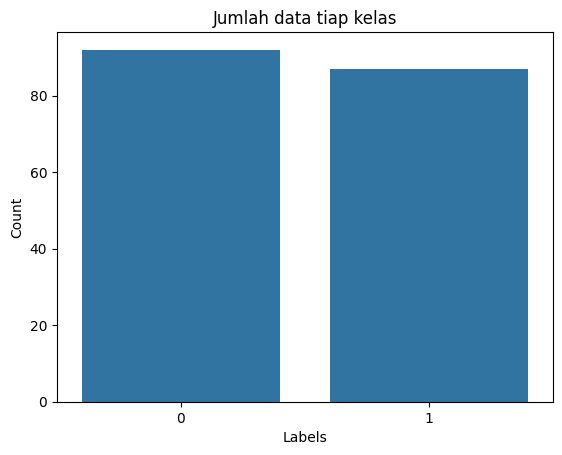

In [ ]:
# Visualisasikan dalam jumlah dalam plot
import seaborn as sns

sns.countplot(x=y)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Jumlah data tiap kelas')
plt.show()

# train test split data

<img src="https://www.researchgate.net/profile/Brian-Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split_W640.jpg" >

In [ ]:
from sklearn.model_selection import train_test_split #library untuk train test split

#melakukan splitting data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Bagi data sementara menjadi data validasi dan data uji
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#train size adalah persentase data test yang di-split dengan proporsi label yang sama


print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

y_train: (143,)
y_test: (18,)
y_val: (18,)


# Klasifikasi CNN

# Deklarasi model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPooling2D, Flatten
# gaya 1
# Create a sequential model
tf.keras.backend.clear_session()

model = Sequential()
# Add layers using model.add
model.add(Input(shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation=None, strides=(1, 1), padding="same", name="conv1"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", strides=(1, 1), padding="same", name="conv2"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                       │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │         262,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,305 (1.04 MB)

 Trainable params: 272,305 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPooling2D, Flatten
#gaya 2
tf.keras.backend.clear_session()
model = Sequential([
  Input(shape=(128,128,3)),
  Conv2D(filters=32,kernel_size=(3, 3), activation=None, strides=(1,1), padding="same", name="conv1"), #padding valid = tidak ada, selengkapnya: https://keras.io/api/layers/convolution_layers/convolution2d/
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(filters=32,kernel_size=(3, 3), activation="relu", strides=(1,1), padding="same", name="conv2"), #padding valid = tidak ada, selengkapnya: https://keras.io/api/layers/convolution_layers/convolution2d/
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(units=8, activation='relu'),
  Dense(units=1, activation='sigmoid')
])
# aktivasi fungsi lainnya https://keras.io/api/layers/activations/

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                       │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │         262,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,305 (1.04 MB)

 Trainable params: 272,305 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
opt=tf.keras.optimizers.Adam(learning_rate=0.001) # selain itu cek di https://keras.io/api/optimizers/
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

training model

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=50, batch_size=64)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 816ms/step - accuracy: 0.5875 - loss: 0.6770 - val_accuracy: 0.4444 - val_loss: 0.6883
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7667 - loss: 0.6082 - val_accuracy: 0.5000 - val_loss: 0.7745
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 705ms/step - accuracy: 0.7705 - loss: 0.5911 - val_accuracy: 0.5000 - val_loss: 0.7162
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 731ms/step - accuracy: 0.8025 - loss: 0.5723 - val_accuracy: 0.4444 - val_loss: 0.7964
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7905 - loss: 0.5518 - val_accuracy: 0.5000 - val_loss: 0.7342
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 747ms/step - accuracy: 0.8415 - loss: 0.5344 - val_accuracy: 0.5556 - val_loss: 0.6309
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 736ms/step - accuracy: 0.8387 - loss: 0.5329 - val_accuracy: 0.5000 - val_loss: 0.7830
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 729ms/step - accuracy: 0.8001 - loss: 0.4265 - val_accuracy: 0.6667 - val_loss: 1.181

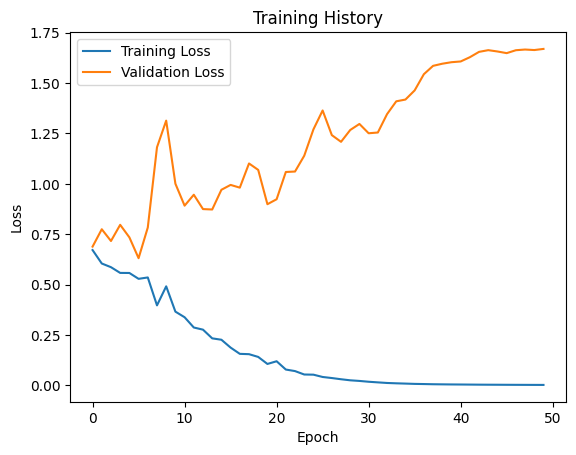

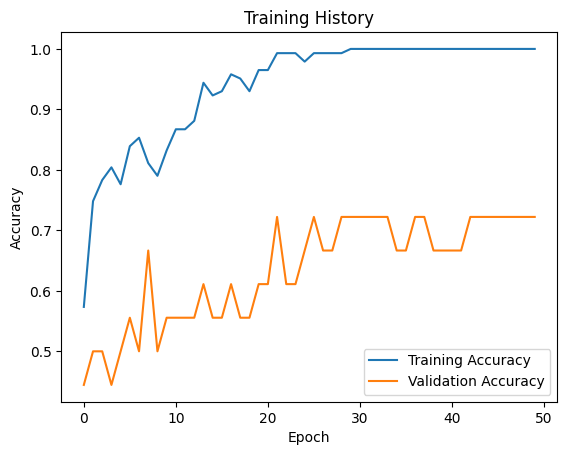

In [ ]:
# plot nilai loss dan akurasi pada setiap epoch
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold 0.5 untuk klasifikasi


print(classification_report(y_test, y_pred, digits=4)) #evaluasi hasil

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
              precision    recall  f1-score   support

           0     1.0000    0.7000    0.8235        10
           1     0.7273    1.0000    0.8421         8

    accuracy                         0.8333        18
   macro avg     0.8636    0.8500    0.8328        18
weighted avg     0.8788    0.8333    0.8318        18



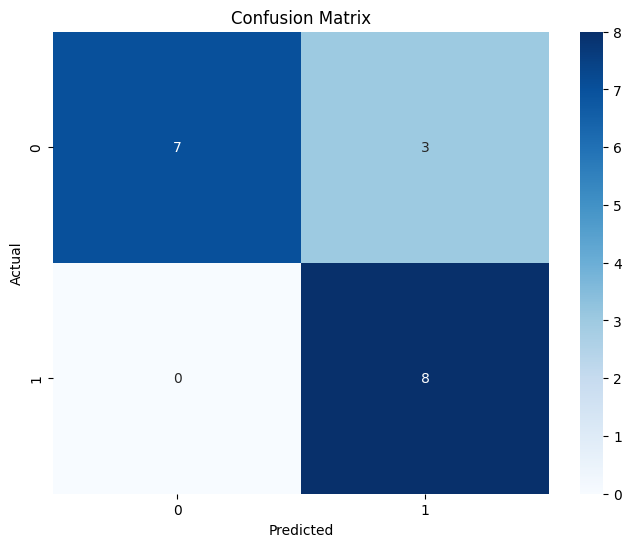

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

support: jumlah sampel di setiap kelas.
Ini memberikan gambaran tentang seberapa seimbang dataset kita dan apakah terdapat kelas yang mungkin kurang terwakili dalam dataset.

macro avg: nilai rata-rata dari metrik evaluasi untuk setiap kelas.
Rata-rata ini diperoleh dengan menghitung rata-rata aritmatika dari skor presisi, recall, dan f1-score dari setiap kelas, tanpa mempertimbangkan frekuensi setiap kelas.
Metrik ini berguna untuk mengevaluasi performa model secara keseluruhan, terlepas dari seberapa seimbang atau tidak seimbang kelas-kelas pada dataset.

micro avg: nilai rata-rata dari metrik evaluasi di seluruh kelas, dengan mempertimbangkan jumlah contoh yang benar diklasifikasikan secara agregat.
Dalam hal ini, mikro rata-rata memperlakukan setiap contoh sebagai satu unit, dan mempertimbangkan jumlah contoh yang benar diklasifikasikan sebagai satu keseluruhan. Metrik ini berguna untuk mengevaluasi performa model pada dataset yang tidak seimbang.

accuracy: rasio antara jumlah contoh yang diklasifikasikan dengan benar dan jumlah contoh keseluruhan.

precision: rasio antara jumlah contoh positif yang diklasifikasikan dengan benar dan jumlah contoh yang diklasifikasikan sebagai positif oleh model.

recall: rasio antara jumlah contoh positif yang diklasifikasikan dengan benar dan jumlah contoh yang sebenarnya positif dalam dataset.

f1-score: rata-rata harmonik dari presisi dan recall. Metrik ini menggabungkan kedua nilai untuk memberikan skor yang mencerminkan keseimbangan antara presisi dan recall.

### Uji testing data baru

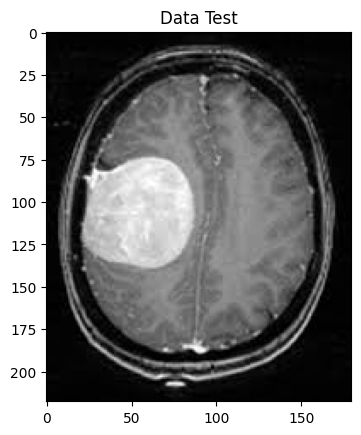

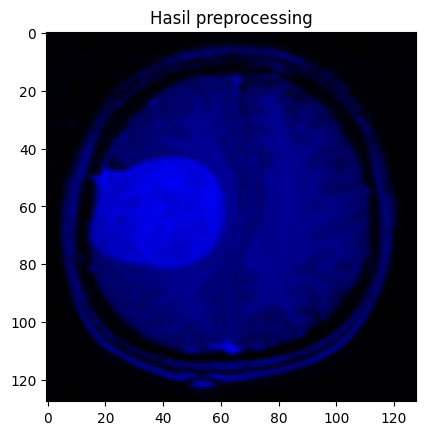

(1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.9459417]]
The predicted image is: [1] -> yes


<ipython-input-34-7f79dcfbfc04>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"The predicted image is: {hasil} -> {Categories[int(hasil)]}")


In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import os.path
import numpy as np

url= image_dir+'yes/Y1.jpg'
img=cv2.imread(url)
plt.figure()
plt.title("Data Test")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#Hasil Uji Klasifikasi pada dataset
Categories = ['no','yes']

#pastikan langkah preprocessing yang dilakukan sama dengan data train
convert = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
blur = cv2.GaussianBlur(convert,(5,5),0)
img_resize = cv2.resize(blur,(128,128))

#tampilkan hasil
plt.figure()
plt.title("Hasil preprocessing")
plt.imshow(img_resize)
plt.show()



test=np.asarray([img_resize / 255.0])#makukan ke list
print(test.shape)
# Mengecek hasil klasifikasi pada salah satu dataset
probability=model.predict(test)
print(probability) #tampilkan nilai probabilitas tiap kelas


hasil = (probability[0] > 0.5).astype(int)  # Threshold 0.5 untuk klasifikasi

print(f"The predicted image is: {hasil} -> {Categories[int(hasil)]}")

# simpan model ML

In [ ]:
from tensorflow.keras.models import load_model



simpan= "/content/drive/MyDrive/COMVIS/Experiment/"
model.save(simpan+'model-DL.h5') #simpan dalam file.h5

# load the model from disk

loaded_model = load_model(simpan+'model-DL.h5')

result = loaded_model.predict(test)

result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[0.9459417]], dtype=float32)

In [ ]:
simpan= "/content/drive/MyDrive/COMVIS/Experiment/"
model.save_weights(simpan+'model-DL.weights.h5')
